<a href="https://colab.research.google.com/github/PhylisKorir/SalesPrediction-using-Linear-Regression/blob/main/Prediction_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SALES PREDICTION SYSTEM USING LINEAR REGRESSION ALGORITHM**

**OBJECTIVE**

- To develop a model that predicts weekly sales for an electronic company that sells TVs, Radio and Newspapers
- The company advertises their sells, and the total amount they will obtain is based on the amount of money they use to advertise


- Importing libraries
- Reading the dataset
- Data Pre-processing
- Exploratory Data Analysis.
- Splitting data
- Choose appropriate model
- Train the model
- Model Evaluation

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

**numpy**: NumPy stands for numeric Python, a python package for the computation and processing of the multi-dimensional and single-dimensional array elements.

**pandas**: Pandas provide high-performance data manipulation in Python.

**matplotlib**: Matplotlib is a library used for data visualization. It is mainly used for basic plotting. Visualization using Matplotlib generally consists of bars, pies, lines, scatter plots, and so on.

**seaborn**: Seaborn is a library used for making statistical graphics of the dataset. It provides a variety of visualization patterns. It uses fewer syntax and has easily interesting default themes. It is used to summarize data in visualizations and show the data’s distribution.

In [ ]:
#Reading the Dataset
data=pd.read_csv('Electronic_sales.csv')
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


**Exploratory Data Analysis**(EDA)
- EDA is an approach of using visualization and statistical techniques to analyze and investigate  datasets and summarizing their characteristics.

In [ ]:
data.shape

(200, 4)

In [ ]:
#Previewing head of dataset
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [ ]:
#Basic information about data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
#Describe the data - Descriptive statistics.

data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
#Find the duplicates

data.duplicated().sum()

0

In [ ]:
#unique values

data['TV'].unique()

data['Newspaper'].unique()

data['Radio'].unique()

array([37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6,  2.1,  2.6,  5.8,
       24. , 35.1,  7.6, 32.9, 47.7, 36.6, 39.6, 20.5, 23.9, 27.7,  5.1,
       15.9, 16.9, 12.6,  3.5, 29.3, 16.7, 27.1, 16. , 28.3, 17.4,  1.5,
       20. ,  1.4,  4.1, 43.8, 49.4, 26.7, 37.7, 22.3, 33.4,  8.4, 25.7,
       22.5,  9.9, 41.5, 15.8, 11.7,  3.1,  9.6, 41.7, 46.2, 28.8, 28.1,
       19.2, 49.6, 29.5,  2. , 42.7, 15.5, 29.6, 42.8,  9.3, 24.6, 14.5,
       27.5, 43.9, 30.6, 14.3, 33. ,  5.7, 43.7,  1.6, 28.5, 29.9,  7.7,
       20.3, 44.5, 43. , 18.4, 40.6, 25.5, 47.8,  4.9, 33.5, 36.5, 14. ,
       31.6, 21. , 42.3,  4.3, 36.3, 10.1, 17.2, 34.3, 46.4, 11. ,  0.3,
        0.4, 26.9,  8.2, 38. , 15.4, 20.6, 46.8, 35. ,  0.8, 36.9, 26.8,
       21.7,  2.4, 34.6, 32.3, 11.8, 38.9,  0. , 49. , 12. ,  2.9, 27.2,
       38.6, 47. , 39. , 28.9, 25.9, 17. , 35.4, 33.2, 14.8,  1.9,  7.3,
       40.3, 25.8, 13.9, 23.3, 39.7, 21.1, 11.6, 43.5,  1.3, 18.1, 35.8,
       36.8, 14.7,  3.4, 37.6,  5.2, 23.6, 10.6, 20

In [ ]:
#Datatypes

data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

**DATA CLEANING**
- Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. 
- It involves handling missing values and handling outliers

In [ ]:
#Handling Missing values
data.isnull().sum()*100/data.shape[0]



TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

Our dataset has no null values

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

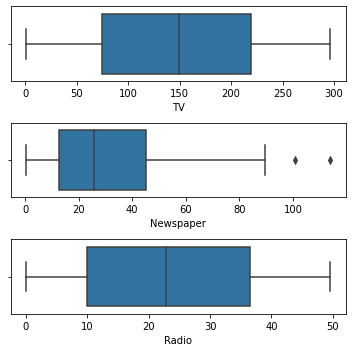

In [ ]:
#Handling outliers
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data['TV'], ax = axs[0])
plt2 = sns.boxplot(data['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(data['Radio'], ax = axs[2])
plt.tight_layout()


**DATA VISUALIZATION**


C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


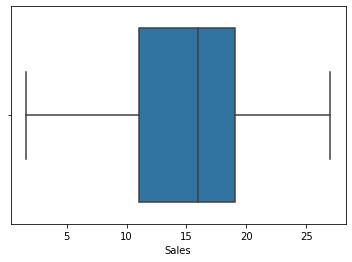

In [ ]:
#Target variable
sns.boxplot(data['Sales'])
plt.show()


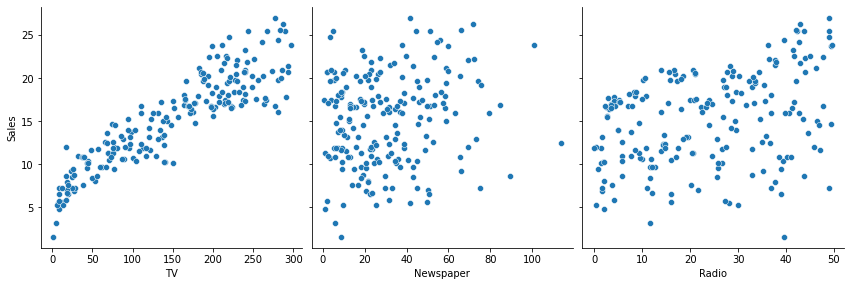

In [ ]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

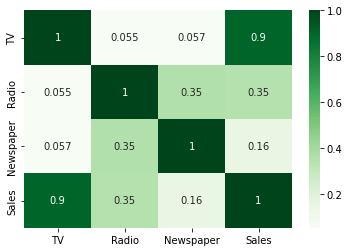

In [ ]:
# Let's see the correlation between different variables.
sns.heatmap(data.corr(), cmap="Greens", annot = True)
plt.show()

**As is visible from the scatterplot and the heatmap, the variable TV seems to be most correlated with Sales**

Our dataset is now clean ready for modelling

In [ ]:
#Setting the values for independent (X) variable and dependent (Y) variable
X= data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [ ]:
#Splitting the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

**Implementing the linear model**

In [ ]:
#Fitting the Multiple Linear Regression model
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

**Model Equation**

In [ ]:
#Intercept and Coefficient
print("Intercept: ", model.intercept_)
print("Coefficients:")
list(zip(X, model.coef_))

Intercept:  4.334595861728431
Coefficients:


[('TV', 0.053829108667250075),
 ('Radio', 0.1100122438855806),
 ('Newspaper', 0.006289950146130319)]

**Model Prediction**

In [ ]:
#Prediction of test set
y_pred= model.predict(X_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [ 9.35221067 20.96344625 16.48851064 20.10971005 21.67148354 16.16054424
 13.5618056  15.39338129 20.81980757 21.00537077 12.29451311 20.70848608
  8.17367308 16.82471534 10.48954832  9.99530649 16.34698901 14.5758119
 17.23065133 12.56890735 18.55715915 12.12402775 20.43312609 17.78017811
 16.73623408 21.60387629 20.13532087 10.82559967 19.12782848 14.84537816
 13.13597397  9.07757918 12.07834143 16.62824427  8.41792841 14.0456697
  9.92050209 14.26101605 16.76262961 17.17185467 18.88797595 15.50165469
 15.78688377 16.86266686 13.03405813 10.47673934 10.6141644  20.85264977
 10.1517568   6.88471443 17.88702583 18.16013938 12.55907083 16.28189561
 18.98024679 11.33714913  5.91026916 10.06159509 17.62383031 13.19628335]


Once we have fitted (trained) the model, we can make predictions using the predict() function. We pass the values of X_test to this method and compare the predicted values called y_pred with y_test values to check how accurate our predicted values are

In [ ]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
mlr_diff.head(10)

,Actual value,Predicted value
126,6.6,9.352211
104,20.7,20.963446
99,17.2,16.488511
92,19.4,20.109710
111,21.8,21.671484
167,17.2,16.160544
116,12.2,13.561806
96,16.7,15.393381
52,22.6,20.819808
69,22.3,21.005371


**Evaluating the Model**

In [ ]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('R squared: {:.2f}'.format(model.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)


R squared: 90.11
Mean Absolute Error: 1.227818356658941
Mean Square Error: 2.6360765623280646
Root Mean Square Error: 1.6235998775338907


The Linear Regression model performs well as 90.11% of the data fit the regression model.
Also, the mean absolute error, mean square error, and the root mean square error are less